In [834]:
import pandas as pd 

df = pd.read_csv('Online_Retail.csv', encoding='ISO-8859-1')
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [835]:
df.shape

(541909, 8)

In [836]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [838]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [839]:
dup = df.duplicated().sum()
print(f"nombre d'observations dupliquées: {dup}")

nombre d'observations dupliquées: 5268


In [ ]:
print("Nombre de valeur unique dans:")
for i in df.columns.tolist():
  print(i,"is",df[i].nunique())

Nombre de valeur unique dans:
InvoiceNo is 25900
Nombre de valeur unique dans:
StockCode is 4070
Nombre de valeur unique dans:
Description is 4223
Nombre de valeur unique dans:
Quantity is 722
Nombre de valeur unique dans:
InvoiceDate is 23260
Nombre de valeur unique dans:
UnitPrice is 1630
Nombre de valeur unique dans:
CustomerID is 4372
Nombre de valeur unique dans:
Country is 38


In [ ]:
df.dropna(subset=['CustomerID'], inplace=True)
df.isnull().sum()

In [ ]:
df.drop_duplicates(inplace=True)
print(f"nombre d'observations dupliquées: " ,df.duplicated().sum())

In [ ]:
df['Country'] = df['Country'].replace({
        'EIRE': 'Ireland',
        'Israel': 'Palestine',
        'Unspecified' : 'United Kingdom ',
        'RSA': 'South Africa',
    })

In [841]:
temp_df = df[~df['InvoiceNo'].astype(str).str.contains('C')] # retire les retours de produits
product = temp_df.groupby('Description')['Quantity'].sum().sort_values(ascending = False).head(10) 

# DataFrame pour le produit le plus vendu
top_product = pd.DataFrame({'Product': product.index, 'Quantity Sold': product.values})
top_product

,Product,Quantity Sold
0,"PAPER CRAFT , LITTLE BIRDIE",80995
1,MEDIUM CERAMIC TOP STORAGE JAR,78033
2,WORLD WAR 2 GLIDERS ASSTD DESIGNS,55047
3,JUMBO BAG RED RETROSPOT,48478
4,WHITE HANGING HEART T-LIGHT HOLDER,37895
5,POPCORN HOLDER,36761
6,ASSORTED COLOUR BIRD ORNAMENT,36461
7,PACK OF 72 RETROSPOT CAKE CASES,36419
8,RABBIT NIGHT LIGHT,30788
9,MINI PAINT SET VINTAGE,26633


In [842]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [843]:
top_customers = temp_df['CustomerID'].value_counts().sort_values(ascending = False).reset_index().rename(columns = {'index' : 'CustomerID', 'CustomerID': 'Count'}).head(5)

top_customers

,Count,count
0,17841.0,7847
1,14911.0,5677
2,14096.0,5111
3,12748.0,4596
4,14606.0,2700


In [844]:
countries = temp_df['Country'].value_counts().reset_index().rename(columns = {'index': 'Country', 'Country': 'Country'})

countries.head()

,Country,count
0,United Kingdom,487622
1,Germany,9042
2,France,8408
3,EIRE,7894
4,Spain,2485


In [ ]:
# # data = df.copy()
# df.dropna(subset = ['CustomerID'], how = 'all', inplace = True)
# df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
df = df[(df['UnitPrice'] > 0) & (df['Quantity'] > 0)]

In [850]:
df = df[~df['InvoiceNo'].astype(str).str.contains('C')] # retire les retours de produits

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['Date'] = df['InvoiceDate'].dt.date
df.head(5)

In [ ]:
print("Nombre d'observations après nettoyage:")
df.shape

(392692, 8)

In [852]:
df['TotalCost'] = (df['Quantity'] * df['UnitPrice']).round(2)
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [ ]:
#application du RFM
latest_date = df['Date'].max()

recency_df = df.groupby('CustomerID')['Date'].max().reset_index().rename(columns = {'Date': 'LastPurchaseDate'})
recency_df.head()

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


In [ ]:
#calcul de la récence
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x : (latest_date - x).days)

recency_df.head(10)

,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310
5,12352.0,2011-11-03,36
6,12353.0,2011-05-19,204
7,12354.0,2011-04-21,232
8,12355.0,2011-05-09,214
9,12356.0,2011-11-17,22


In [856]:
recency_df.drop('LastPurchaseDate', axis = 1, inplace = True)

In [857]:
frequency_df = df.groupby('CustomerID')['InvoiceNo'].count().reset_index().rename(columns = {'InvoiceNo': 'Frequency'})
tem_df = recency_df.merge(frequency_df, on = 'CustomerID')
tem_df.head()


,CustomerID,Recency,Frequency
0,12346.0,325,1
1,12347.0,2,182
2,12348.0,75,31
3,12349.0,18,73
4,12350.0,310,17


In [858]:
monetary_df = df.groupby('CustomerID')['TotalCost'].sum().reset_index().rename(columns = {'TotalCost': 'MonetaryValue'})
rfm_df = tem_df.merge(monetary_df, on = 'CustomerID')
rfm_df.head()

,CustomerID,Recency,Frequency,MonetaryValue
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


<Axes: >

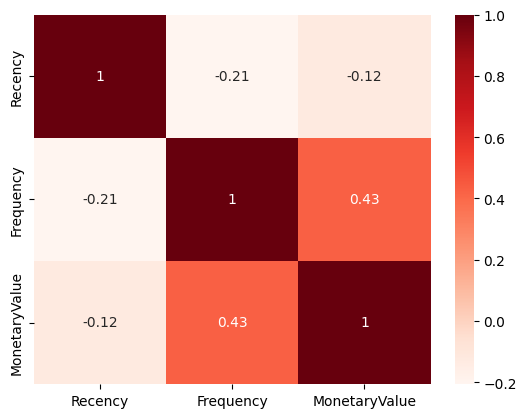

In [ ]:
import seaborn as sns
rfm = rfm_df.set_index('CustomerID')
rfm.corr()
sns.heatmap(rfm.corr(), annot = True, cmap = 'Reds')

In [862]:
#la methode skew() est utilisée pour mesurer l'asymétrie des données autour de la moyenne.
rfm.skew()

Recency           1.245826
Frequency        18.043530
MonetaryValue    19.339368
dtype: float64

In [ ]:
import numpy as np
# Calculate the logarithmic values of the Recency and Monetary features

rfm_r_log = np.log(rfm['Recency'] + 0.1)
rfm_m_log = np.log(rfm['MonetaryValue'] + 0.1)
rfm_f_log = np.log(rfm['Frequency'])

In [864]:
# Create a DataFrame containing logarithmic values of the Recency, Monetary and Frequency columns

log_data = pd.DataFrame({'Monetary' : rfm_m_log, 'Recency': rfm_r_log, 'Frequency': rfm_f_log})

log_data.head()

,Monetary,Recency,Frequency
CustomerID,,,
12346.0,11.253944,5.784133,0.000000
12347.0,8.368716,0.741937,5.204007
12348.0,7.494063,4.318821,3.433987
12349.0,7.471733,2.895912,4.290459
12350.0,5.812637,5.736895,2.833213


In [865]:
log_data.skew()

Monetary     0.385332
Recency     -0.869633
Frequency   -0.217968
dtype: float64

<Axes: >

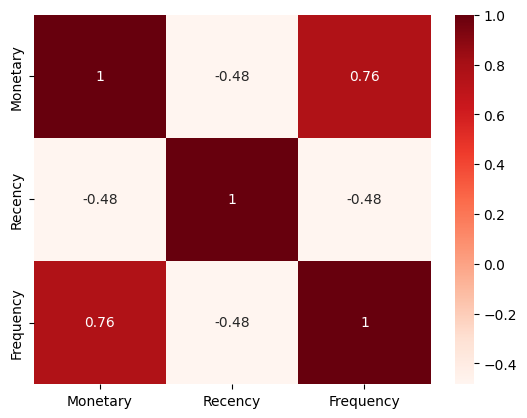

In [866]:
# Features correlation after log transformation or data normalization
sns.heatmap(log_data.corr(), annot = True, cmap = 'Reds')

In [868]:
from sklearn.preprocessing import StandardScaler
features = ['Recency', 'Frequency', 'Monetary']
scaler = StandardScaler()
X = scaler.fit_transform(log_data[features].values)

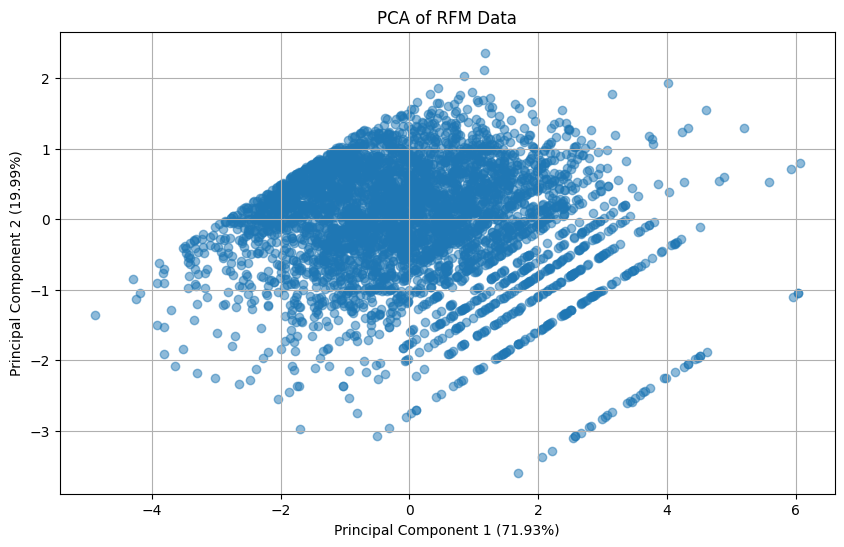

Explained variance ratio: [0.71927065 0.19987316]


In [869]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce dimensions
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'], index=log_data.index)

plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.title('PCA of RFM Data')
plt.xlabel('Principal Component 1 (%.2f%%)' % (pca.explained_variance_ratio_[0]*100))
plt.ylabel('Principal Component 2 (%.2f%%)' % (pca.explained_variance_ratio_[1]*100))
plt.grid()
plt.show()
# Display explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)


#PC1 likely represents an overall "customer value" dimension (combining Frequency, Monetary, and inverse Recency, since high Recency means less recent purchases).

#PC2 might differentiate between high-frequency/low-spend customers vs. low-frequency/high-spend customers.

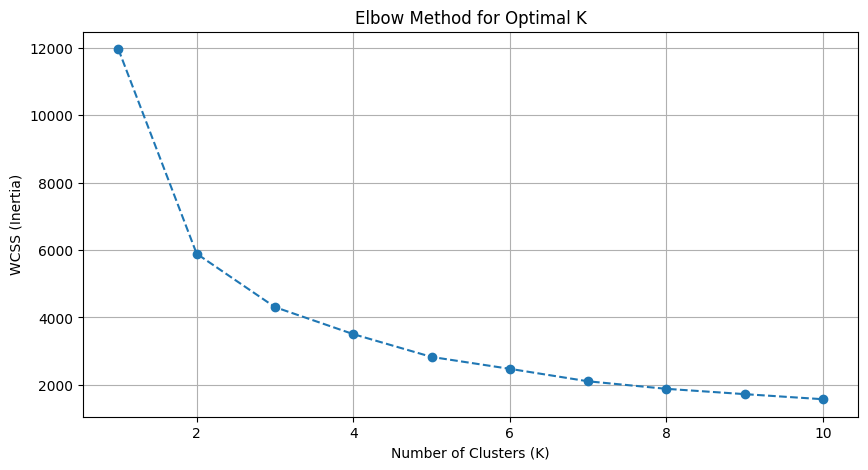

In [870]:
from sklearn.cluster import KMeans
import numpy as np

# Calculate WCSS (Within-Cluster Sum of Squares) for different K values
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.grid()
plt.show()

In [871]:
# Apply K-Means with K=4
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Add cluster labels to the PCA DataFrame
pca_df['Cluster'] = clusters

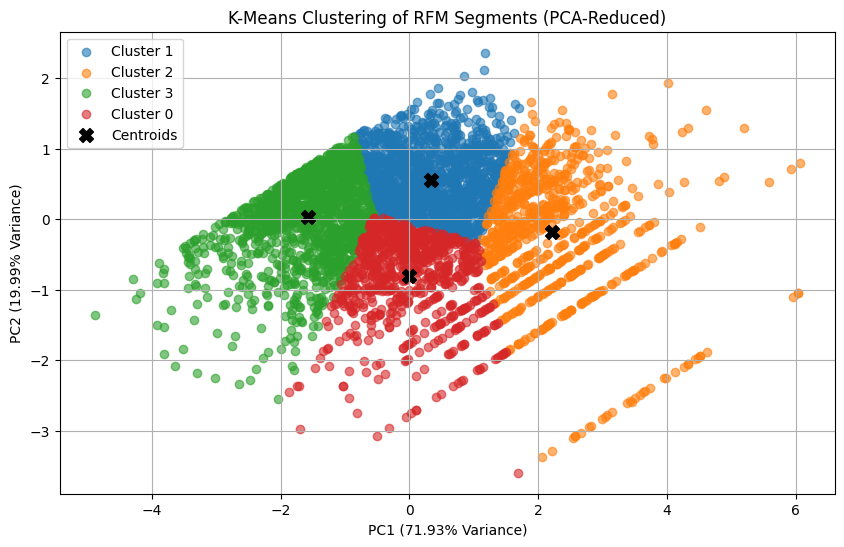

In [872]:
plt.figure(figsize=(10, 6))
for cluster in pca_df['Cluster'].unique():
    plt.scatter(
        pca_df[pca_df['Cluster'] == cluster]['PC1'],
        pca_df[pca_df['Cluster'] == cluster]['PC2'],
        label=f'Cluster {cluster}',
        alpha=0.6
    )

# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='X', s=100, label='Centroids')

plt.title('K-Means Clustering of RFM Segments (PCA-Reduced)')
plt.xlabel('PC1 (71.93% Variance)')
plt.ylabel('PC2 (19.99% Variance)')
plt.legend()
plt.grid()
plt.show()

In [873]:
# Assign clusters back to the original RFM data
# Assign clusters back to the original RFM data with meaningful names
cluster_names = {0: 'Bronze', 1: 'Silver', 2: 'Diamond', 3: 'Iron'}
rfm_df['Cluster'] = clusters
rfm_df['Cluster'] = rfm_df['Cluster'].map(cluster_names)

# Group by cluster and compute mean RFM values
cluster_summary = rfm_df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean'
}).round(2)

print(cluster_summary)

         Recency  Frequency  MonetaryValue
Cluster                                   
Bronze     19.64      36.37         595.97
Diamond    10.56     293.24        7476.80
Iron      183.22      15.12         295.38
Silver     88.18      83.28        1579.28


In [874]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, clusters, test_size=0.2, random_state=42)

In [875]:
from sklearn.neighbors import KNeighborsClassifier


# Based on the Elbow Method, choose the K where the WCSS starts to decrease more slowly
knn = KNeighborsClassifier(n_neighbors=4)  
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [876]:
from sklearn.metrics import classification_report

y_test_named = [cluster_names[cluster] for cluster in y_test]
predictions_named = [cluster_names[cluster] for cluster in predictions]

# Display classification report with cluster names
print(classification_report(y_test_named, predictions_named))

              precision    recall  f1-score   support

      Bronze       0.96      0.99      0.98       163
     Diamond       1.00      0.98      0.99       162
        Iron       1.00      0.98      0.99       271
      Silver       0.99      0.99      0.99       272

    accuracy                           0.99       868
   macro avg       0.99      0.99      0.99       868
weighted avg       0.99      0.99      0.99       868



In [877]:
# Prédiction sur les 5 premiers clients du jeu de données
named_predictions = [cluster_names[cluster] for cluster in predictions[:5]]
print(named_predictions)

['Iron', 'Iron', 'Bronze', 'Diamond', 'Iron']


In [878]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of the model: {accuracy:.2f}")

Accuracy of the model: 0.99


In [879]:
from sklearn.model_selection import cross_val_score

# la méthode de validation croisée
cv_scores = cross_val_score(knn, X_pca, clusters, cv=5, scoring='accuracy')

print("Cross-validation accuracy scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

Cross-validation accuracy scores: [0.98732719 0.98732719 0.9781106  0.98500577 0.98385236]
Mean accuracy: 0.9843246216892829


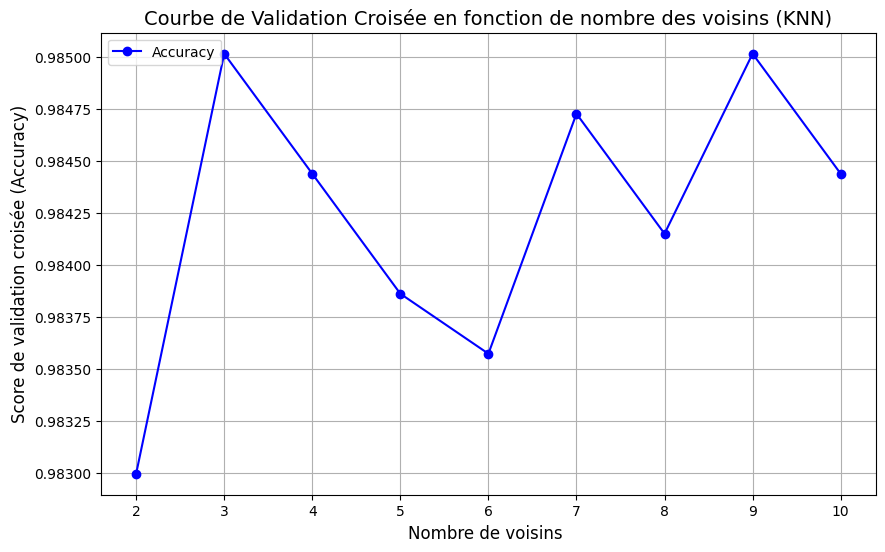

Meilleure nombre des voisins : 3
Score de validation croisée : 0.99


In [898]:
from sklearn.model_selection import GridSearchCV

# Définir les paramètres à tester (valeurs de K)
param_grid = {'n_neighbors': list(range(2, 11))}

# Initialiser le modèle KNN
knn = KNeighborsClassifier()

# Configurer GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

# Effectuer la recherche
grid_search.fit(X_train, y_train)
# Récupérer les scores de validation croisée pour chaque valeur de K
mean_scores = grid_search.cv_results_['mean_test_score']

# Tracer la courbe
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), mean_scores, marker='o', linestyle='-', color='b', label='Accuracy')
plt.title('Courbe de Validation Croisée en fonction de nombre des voisins (KNN)', fontsize=14)
plt.xlabel('Nombre de voisins ', fontsize=12)
plt.ylabel('Score de validation croisée (Accuracy)', fontsize=12)
plt.grid(True)
plt.xticks(range(2, 11))  # Afficher tous les K
plt.legend()
plt.show()
# Afficher la meilleure valeur de K et le score correspondant
print(f"Meilleure nombre des voisins : {grid_search.best_params_['n_neighbors']}")
print(f"Score de validation croisée : {grid_search.best_score_:.2f}")

In [881]:
from sklearn.tree import DecisionTreeClassifier

# Créer un modèle d'arbre de décision
decision_tree = DecisionTreeClassifier(random_state=42)

# Ajuster le modèle aux données d'entraînement
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

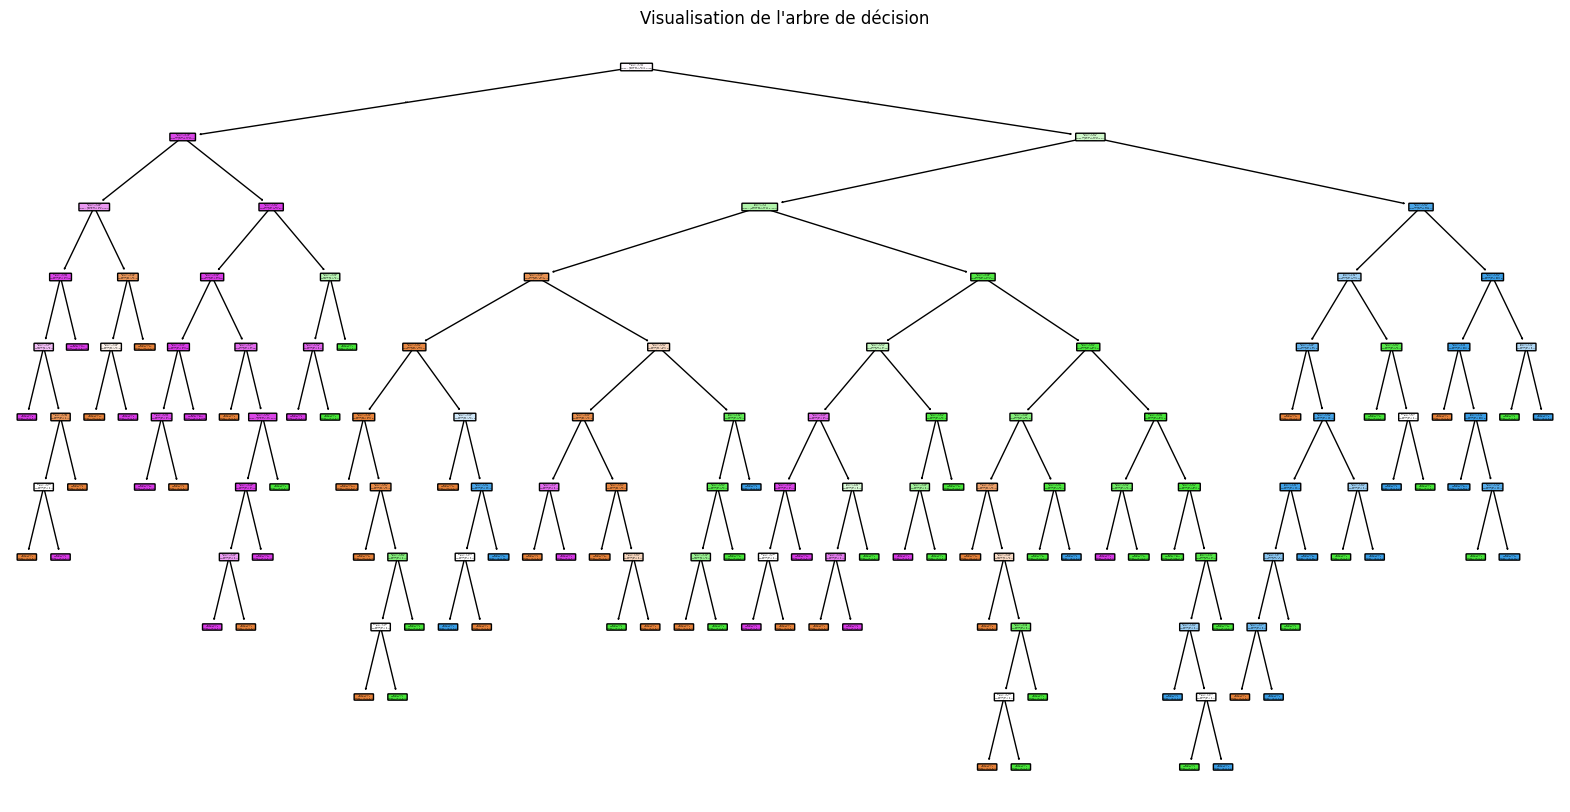

In [882]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(decision_tree, feature_names=['PC1', 'PC2'], class_names=list(cluster_names.values()), filled=True, rounded=True)
plt.title("Visualisation de l'arbre de décision")
plt.show()

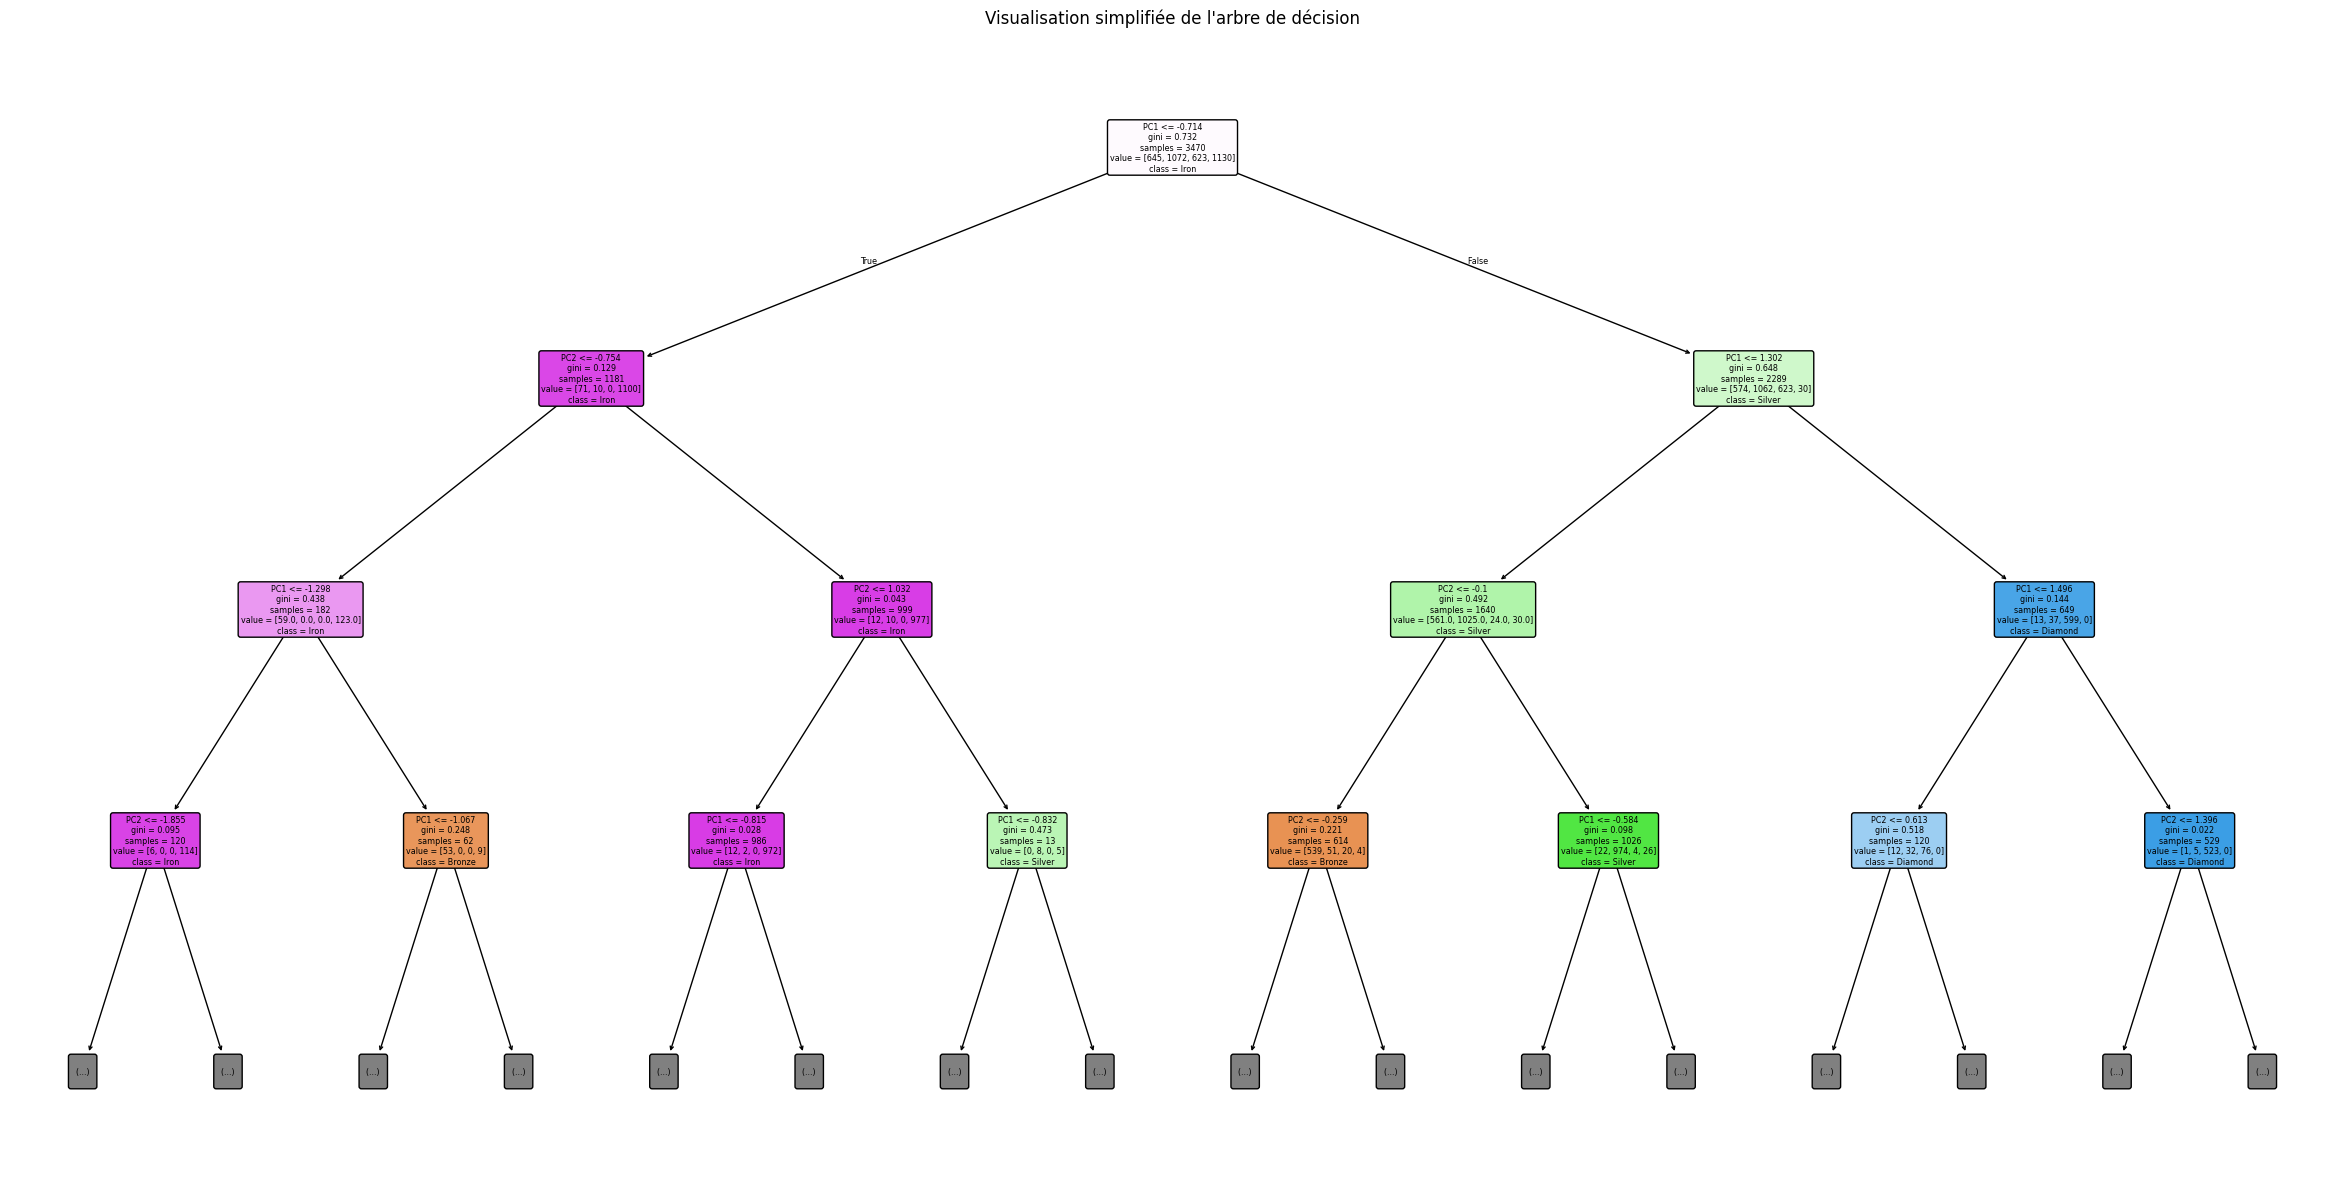

In [883]:
plt.figure(figsize=(30, 15))  # Augmentez la taille de la figure
plot_tree(
    decision_tree, 
    feature_names=['PC1', 'PC2'], 
    class_names=list(cluster_names.values()), 
    filled=True, 
    rounded=True, 
    max_depth=3  # Limitez la profondeur de l'arbre affiché
)
plt.title("Visualisation simplifiée de l'arbre de décision")
plt.show()

In [884]:
named_predictions = [cluster_names[cluster] for cluster in predictions[:5]]
# Use the DecisionTreeClassifier model to predict the cluster for the first 5 test samples
decision_tree_predictions = decision_tree.predict(X_test[:5])

# Map the predicted clusters to their respective names
named_decision_tree_predictions = [cluster_names[cluster] for cluster in decision_tree_predictions]

# Print the predictions
print(named_decision_tree_predictions)

['Iron', 'Iron', 'Silver', 'Diamond', 'Iron']


In [885]:
decision_tree_accuracy = accuracy_score(y_test, decision_tree.predict(X_test))
print(f"Accuracy du modèle DecisionTreeClassifier: {decision_tree_accuracy:.2f}")

Accuracy du modèle DecisionTreeClassifier: 0.98


In [886]:
from sklearn.model_selection import cross_val_score

# Validation croisée avec 5 folds
cv_scores_decision_tree = cross_val_score(decision_tree, X_pca, clusters, cv=5, scoring='accuracy')

# Afficher les scores d'accuracy pour chaque fold
print("Accuracy scores pour chaque cluster:", cv_scores_decision_tree)

# Calculer et afficher la moyenne des scores
mean_accuracy_decision_tree = cv_scores_decision_tree.mean()
print("accuracy moyenne:", mean_accuracy_decision_tree)

Accuracy scores pour chaque cluster: [0.98847926 0.98387097 0.97926267 0.97693195 0.97116494]
accuracy moyenne: 0.9799419578077909


In [887]:
# Réentraîner le modèle DecisionTreeClassifier avec les nouveaux paramètres

decision_tree_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
decision_tree_entropy.fit(X_train, y_train)

entropy_predictions = decision_tree_entropy.predict(X_test)

entropy_accuracy = accuracy_score(y_test, entropy_predictions)
print(f"Accuracy du modèle DecisionTreeClassifier entropy max_depth 3): {entropy_accuracy:.2f}")

Accuracy du modèle DecisionTreeClassifier entropy max_depth 3): 0.93


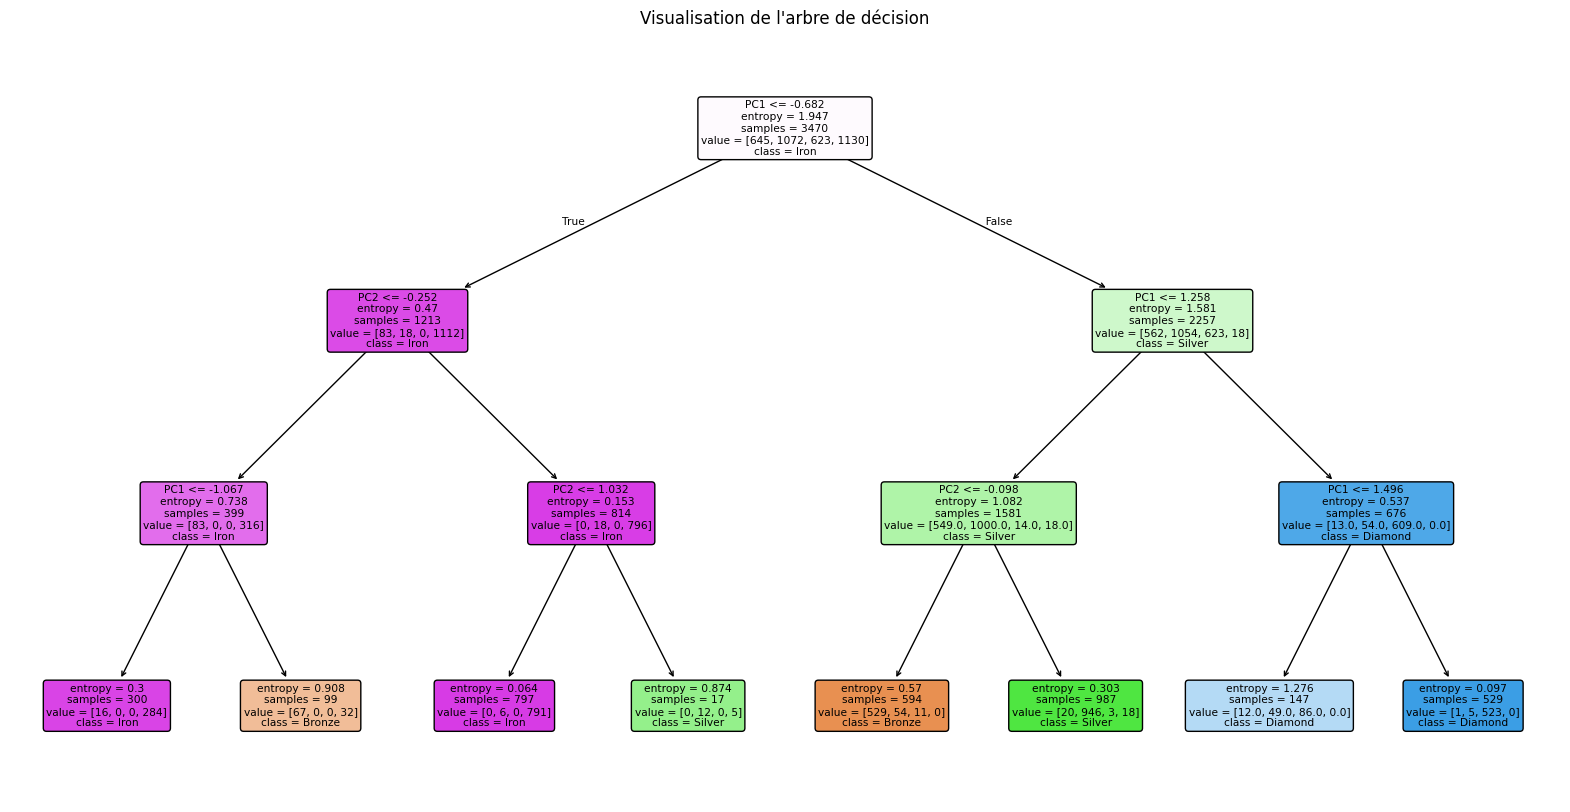

In [888]:
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(
    decision_tree_entropy, 
    feature_names=['PC1', 'PC2'], 
    class_names=list(cluster_names.values()), 
    filled=True, 
    rounded=True
)
plt.title("Visualisation de l'arbre de décision")
plt.show()

In [889]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialiser le modèle Bagging avec un arbre de décision comme estimateur de base
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=50,  # Nombre d'estimateurs
    random_state=42
)

# Entraîner le modèle sur les données d'entraînement
bagging_model.fit(X_train, y_train)

# Prédire les clusters sur les données de test
bagging_predictions = bagging_model.predict(X_test)

# Calculer l'accuracy du modèle
bagging_accuracy = accuracy_score(y_test, bagging_predictions)
print(f"Accuracy du modèle BaggingClassifier: {bagging_accuracy:.4f}")

Accuracy du modèle BaggingClassifier: 0.9850


In [890]:
# Prédiction sur les 5 premières lignes du jeu de données de test
bagging_predictions_named = [cluster_names[cluster] for cluster in bagging_predictions[:5]]

# Afficher les prédictions
print(bagging_predictions_named)

['Iron', 'Iron', 'Silver', 'Diamond', 'Iron']


In [891]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialiser le modèle Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraîner le modèle sur les données d'entraînement
random_forest.fit(X_train, y_train)

# Prédire les clusters sur les données de test
rf_predictions = random_forest.predict(X_test)

# Prédire les clusters pour les 5 premières lignes
rf_named_predictions = [cluster_names[cluster] for cluster in rf_predictions[:5]]

rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Accuracy du modèle RandomForestClassifier: {rf_accuracy:.5f}")
# Afficher les prédictions
print(rf_named_predictions)

Accuracy du modèle RandomForestClassifier: 0.98618
['Iron', 'Iron', 'Silver', 'Diamond', 'Iron']


In [892]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Initialiser le modèle Gradient Boosting
boosting_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Entraîner le modèle sur les données d'entraînement
boosting_model.fit(X_train, y_train)

# Prédire les clusters sur les données de test
boosting_predictions = boosting_model.predict(X_test)

# Prédire les clusters pour les 5 premières lignes
boosting_named_predictions = [cluster_names[cluster] for cluster in boosting_predictions[:5]]

boosting_accuracy = accuracy_score(y_test, boosting_predictions)
print(f"Accuracy du modèle RandomForest: {boosting_accuracy:.6f}")
# Afficher les prédictions
print(boosting_named_predictions)

Accuracy du modèle RandomForest: 0.979263
['Iron', 'Iron', 'Silver', 'Diamond', 'Iron']


In [893]:
import pandas as pd

# Résumer les performances dans un DataFrame pour une meilleure visualisation
performance_df = pd.DataFrame({
    'Modèle': ['BaggingClassifier', 'RandomForestClassifier', 'Boosting'],
    'Accuracy': [bagging_accuracy, rf_accuracy, boosting_accuracy]
})

# Afficher les performances
print(performance_df)

                   Modèle  Accuracy
0       BaggingClassifier  0.985023
1  RandomForestClassifier  0.986175
2                Boosting  0.979263


In [894]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialiser le modèle Naive Bayes
naive_bayes_model = GaussianNB()

# Ajuster le modèle aux données d'entraînement
naive_bayes_model.fit(X_train, y_train)

# Prédire les clusters sur les données de test
nb_predictions = naive_bayes_model.predict(X_test)

# Calculer l'accuracy du modèle
nb_accuracy = accuracy_score(y_test, nb_predictions)
print(f"Accuracy du modèle Naive Bayes: {nb_accuracy:.4f}")

Accuracy du modèle Naive Bayes: 0.9585


In [895]:
# Prédire les clusters pour les 5 premiers patients du jeu de données de test
nb_named_predictions = [cluster_names[cluster] for cluster in nb_predictions[:5]]
# Afficher les prédictions
print(nb_named_predictions)

['Iron', 'Iron', 'Silver', 'Diamond', 'Iron']


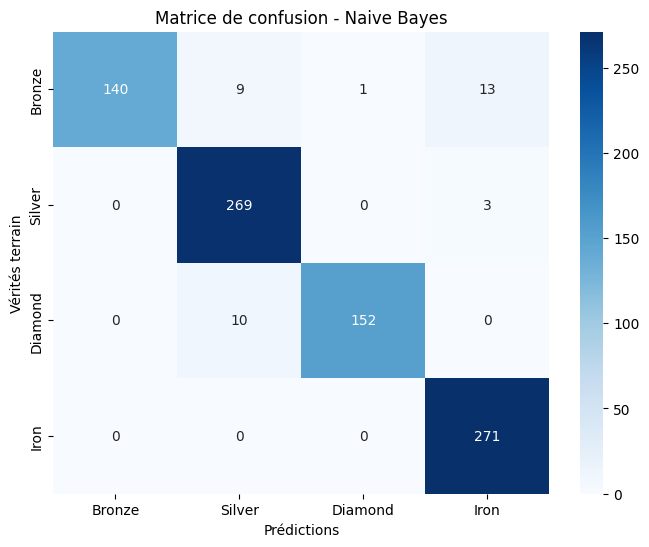

Rapport de classification - Naive Bayes:
              precision    recall  f1-score   support

      Bronze       1.00      0.86      0.92       163
     Diamond       0.99      0.94      0.97       162
        Iron       0.94      1.00      0.97       271
      Silver       0.93      0.99      0.96       272

    accuracy                           0.96       868
   macro avg       0.97      0.95      0.96       868
weighted avg       0.96      0.96      0.96       868



In [896]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

import matplotlib.pyplot as plt

# Generate predictions for the entire test set
predictions_named_full = [cluster_names[cluster] for cluster in nb_predictions]

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test_named, predictions_named_full, labels=list(cluster_names.values()))

# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=cluster_names.values(), yticklabels=cluster_names.values())
plt.title('Matrice de confusion - Naive Bayes')
plt.xlabel('Prédictions')
plt.ylabel('Vérités terrain')
plt.show()

# Afficher le rapport de classification
print("Rapport de classification - Naive Bayes:")
print(classification_report(y_test_named, predictions_named_full))

In [897]:
from sklearn.model_selection import cross_val_score

# Validation croisée avec 5 folds
cv_scores_nb = cross_val_score(naive_bayes_model, X_pca, clusters, cv=5, scoring='accuracy').round(4)

# Afficher les scores d'accuracy pour chaque fold
print("Accuracy scores pour chaque cluster:", cv_scores_nb)

# Calculer et afficher la moyenne des scores
mean_accuracy_nb = cv_scores_nb.mean().round(4)
print("Accuracy moyenne:", mean_accuracy_nb)

Accuracy scores pour chaque cluster: [0.9585 0.9608 0.9608 0.9585 0.9573]
Accuracy moyenne: 0.9592
